In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from pylab import rcParams
import plotly
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff



# TIỀN XỬ LÝ DỮ LIỆU VÀ TRỰC QUAN HÓA

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.shape

(27819, 31)

In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

kiểm tra dataset có cột nào bị thiếu không

In [4]:
dataset.isnull().values.any()

np.True_

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
import plotly.express as px
df = pd.value_counts(dataset['Class'], sort = True).sort_index()
fig = px.bar(df)
fig.show()

<ipython-input-7-3858172910>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df = pd.value_counts(dataset['Class'], sort = True).sort_index()


In [8]:
import plotly.express as px
df = dataset
fig = px.histogram(df, x=dataset.Time, color=dataset.Class)
fig.show()

Vẽ biểu đồ Boxplot để hiển thị phân bố giá trị giao dịch theo từng loại giao dịch (Class). Các tham số chính:x=df.Class → Trục X là loại giao dịch:
0 → Giao dịch hợp lệ.
1 → Giao dịch gian lận.
y=df.Amount → Trục Y là số tiền giao dịch.
points="all" → Hiển thị tất cả các điểm dữ liệu lên biểu đồ, giúp quan sát giá trị cụ thể của từng giao dịch.

In [9]:
import plotly.express as px  # Nhập thư viện Plotly Express để vẽ biểu đồ

df = dataset  # Gán tập dữ liệu vào biến df

fig = px.box(df,
             x=df.Class,  # Trục X là loại giao dịch (hợp lệ/gian lận)
             y=df.Amount,  # Trục Y là giá trị giao dịch (số tiền)
             points="all"  # Hiển thị tất cả các điểm dữ liệu trên biểu đồ
            )

fig.show()  # Hiển thị biểu đồ


## Normal and Fraud Dataset

In [10]:
Fraud = dataset[dataset['Class']==1]
Normal = dataset[dataset['Class']==0]

In [11]:
pd.concat([Normal.Amount.describe(), Normal.Time.describe()],  axis=1)

,Amount,Time
count,27725.000000,27725.000000
mean,77.232517,20440.754518
std,219.509762,11873.023524
min,0.000000,0.000000
25%,6.490000,9039.000000
50%,19.950000,24689.000000
75%,69.320000,31329.000000
max,7879.420000,34712.000000


In [12]:
pd.concat([Fraud.Amount.describe(), Fraud.Time.describe()],  axis=1)

,Amount,Time
count,93.000000,93.000000
mean,96.609677,18829.451613
std,259.128010,9321.493796
min,0.000000,406.000000
25%,1.000000,8886.000000
50%,1.100000,18675.000000
75%,99.990000,27163.000000
max,1809.680000,34687.000000


In [13]:
print('Fraud Shape:\t', Fraud.shape)
print('Normal Shape:\t', Normal.shape)

Fraud Shape:	 (93, 31)
Normal Shape:	 (27725, 31)


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Tạo một figure với 2 hàng, 1 cột để hiển thị 2 biểu đồ riêng biệt
fig = make_subplots(rows=2, cols=1)

# Tạo scatter plot cho giao dịch gian lận (Fraud)
trace1 = go.Scatter(x=Fraud.Time, y=Fraud.Amount,
                    mode='markers',  # Vẽ điểm (dạng scatter)
                    name='Giao dịch gian lận'
                    )

# Tạo scatter plot cho giao dịch hợp lệ (Normal)
trace2 = go.Scatter(x=Normal.Time, y=Normal.Amount,
                    mode='markers',
                    name='Giao dịch hợp lệ'
                    )
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.show()


### Sample Selection

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['amount_scale'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['time_scale'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
amount_scale = dataset['amount_scale']
time_scale = dataset['time_scale']

dataset.drop(['amount_scale', 'time_scale'], axis=1, inplace=True)
dataset.insert(0, 'amount_scale', amount_scale)
dataset.insert(1, 'time_scale', time_scale)

dataset.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.056133,-1.107421,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.273686,-1.107421,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,5.687941,-1.107376,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.641957,-1.107376,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.793467,-1.107331,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [17]:
dataset = dataset.sample(frac=1)

fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud, normal])

sample_data = normal_distributed_data.sample(frac=1, random_state=42)

sample_data.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
928,0.070245,-1.075825,-0.180275,0.346061,1.080077,0.314034,0.699600,0.194100,0.582838,-0.120210,...,0.138961,-0.235144,-0.446640,-0.173730,-1.003853,-0.357025,0.324307,-0.048032,-0.078533,0.0
13688,1.613415,-0.018625,0.868390,-0.270441,1.262107,1.395905,-0.756214,0.459671,-0.676908,0.227738,...,0.041081,0.115702,0.351792,-0.084167,-0.052658,0.168071,-0.384078,0.026927,0.040494,0.0
15810,1.269167,0.115656,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,...,1.667304,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,1.0
12919,0.847538,-0.089267,1.280178,-1.249569,0.151059,-2.495440,-1.286661,-0.502485,-0.887994,-0.072076,...,-0.526408,-0.488078,-0.573243,-0.109392,-0.526635,0.518160,-0.713461,0.075879,0.023661,0.0
8399,-0.273844,-0.602338,-0.359202,0.882742,0.109104,-1.006367,2.537606,3.409455,0.022537,0.856843,...,0.177216,-0.431776,-1.090349,-0.043902,0.922247,-0.058506,0.047813,0.240376,0.107908,0.0


In [18]:
sample_data.shape

(585, 31)

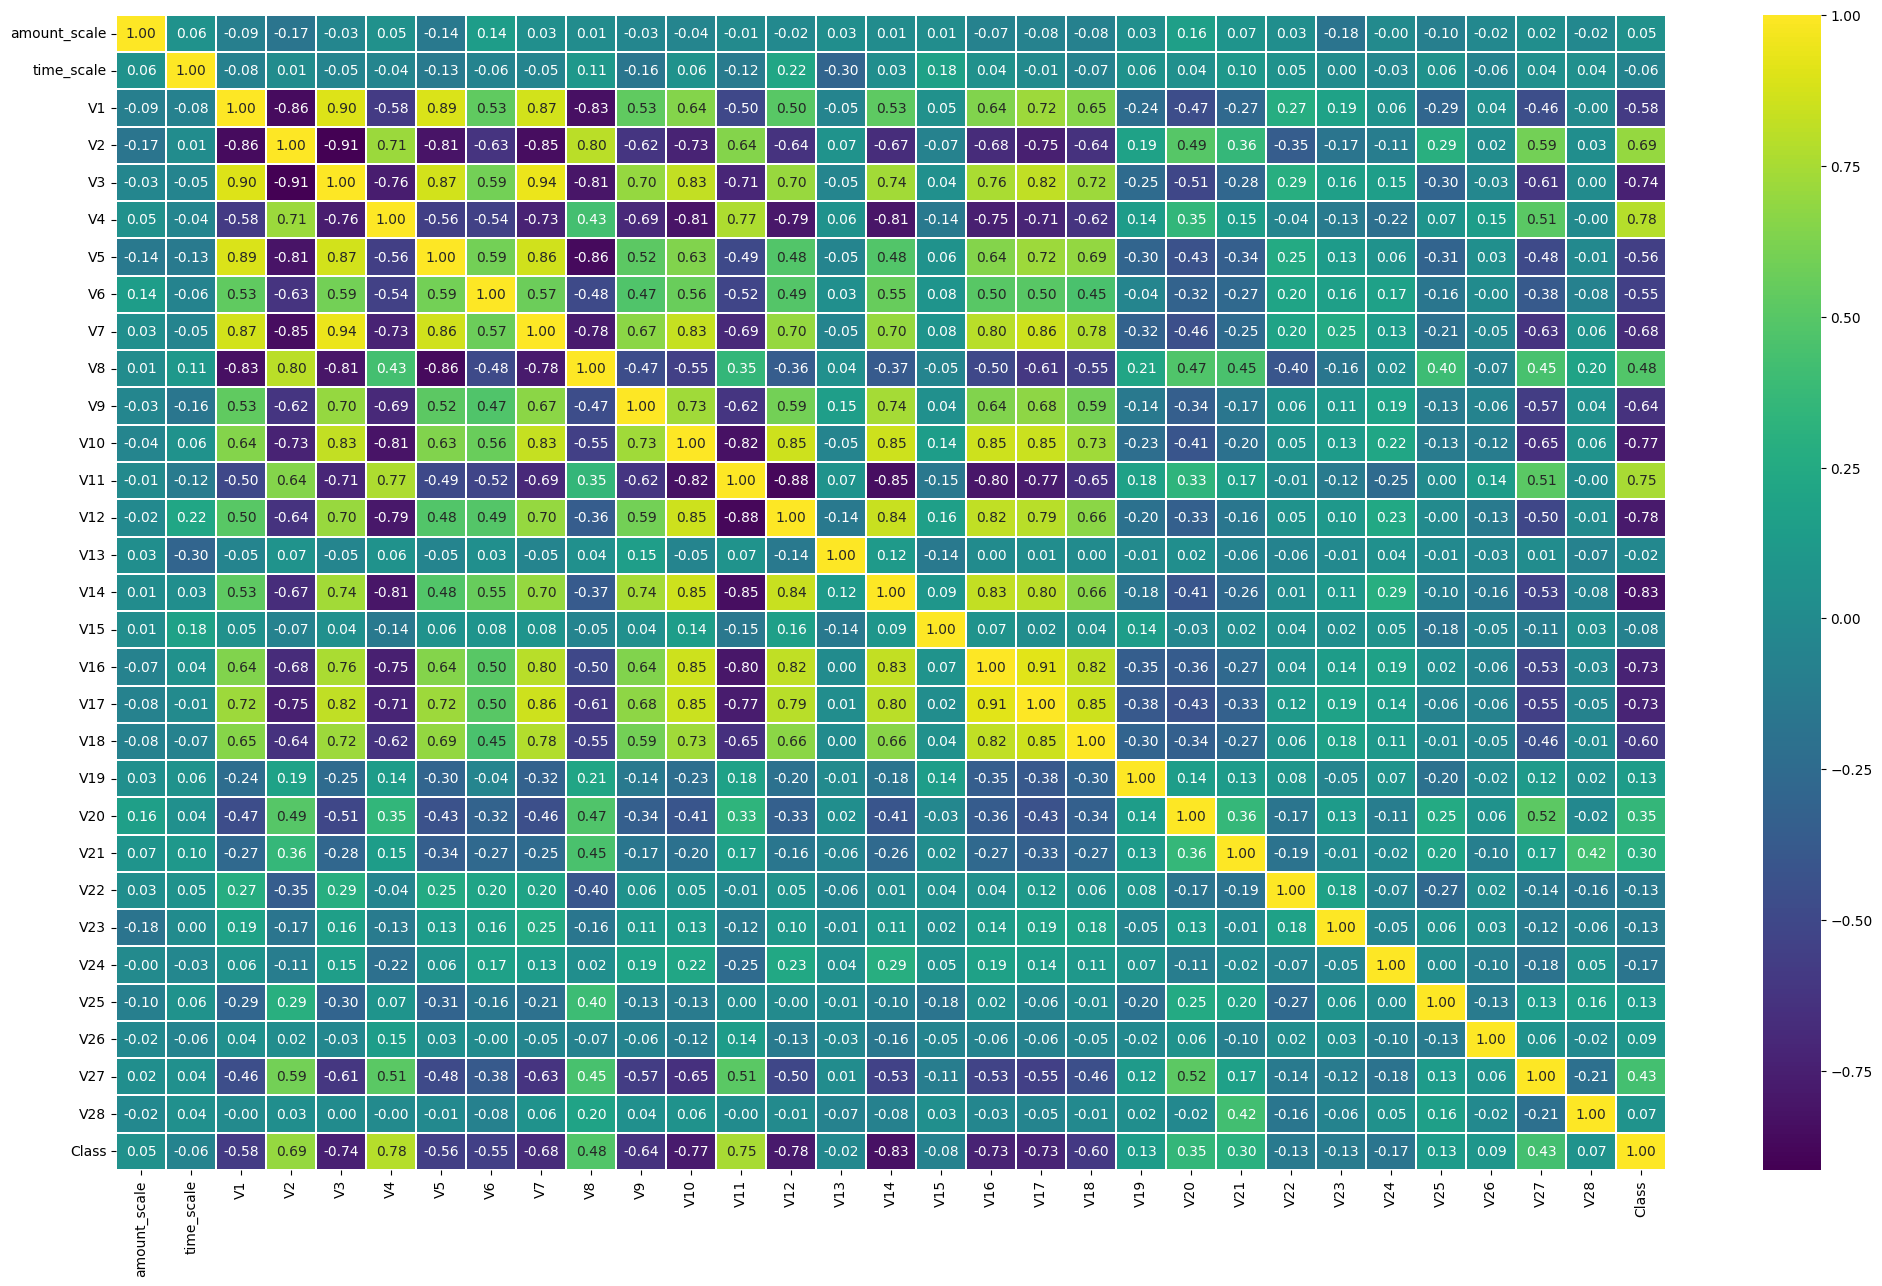

In [19]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(sample_data.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')
plt.savefig("corr_sample.png")
plt.show()

___

# Models

# SVM

In [20]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [22]:
from sklearn.svm import SVC
svm_model = SVC()

In [23]:
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [24]:
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [25]:
svm_cv_model.best_score_

np.float64(0.9770408163265305)

In [26]:
best_params = svm_cv_model.best_params_
print(best_params)

{'C': np.int64(1), 'kernel': 'rbf'}


In [27]:
svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)

In [28]:
y_pred_svm = svm.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_svm)

0.9845360824742269

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_test, y_test, cv=21).mean()

np.float64(0.9851851851851853)

In [31]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       170
         1.0       1.00      0.88      0.93        24

    accuracy                           0.98       194
   macro avg       0.99      0.94      0.96       194
weighted avg       0.98      0.98      0.98       194



In [32]:
from imblearn.metrics import classification_report_imbalanced, sensitivity_specificity_support
print('sensitivity and specificity:', sensitivity_specificity_support(y_test, y_pred_svm, average='micro', labels=pd.unique(dataset.Class)))
print(classification_report_imbalanced(y_test, y_pred_svm))

sensitivity and specificity: (np.float64(0.9845360824742269), np.float64(0.9922680412371134), None)
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.98      1.00      0.88      0.99      0.94      0.89       170
        1.0       1.00      0.88      1.00      0.93      0.94      0.86        24

avg / total       0.98      0.98      0.89      0.98      0.94      0.88       194



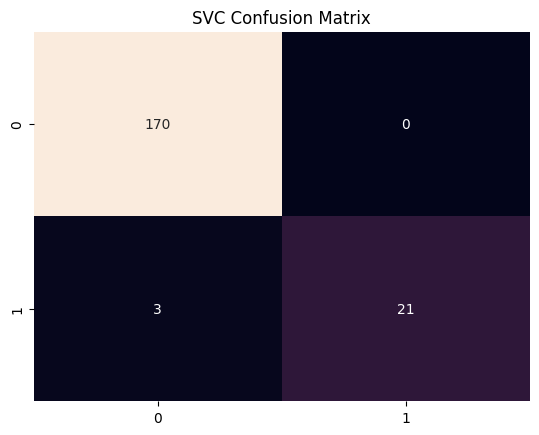

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVC Confusion Matrix')
plt.savefig('svc_con_mat')
plt.show()

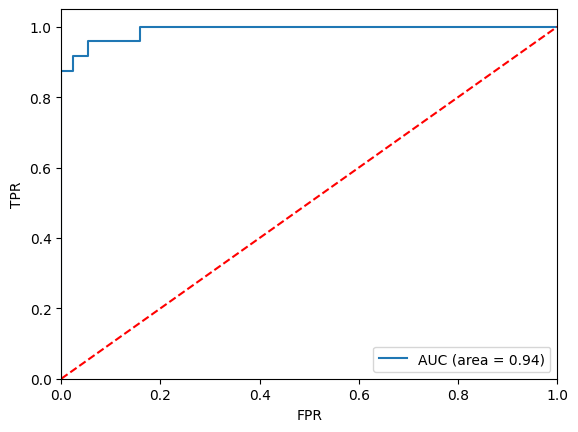

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % svm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [37]:
rf_params = {'n_estimators': [100,200,500],
            'max_features': [3,5,7],
            'min_samples_split':[5,10,20]}

In [38]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=7, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 7 folds for each of 27 candidates, totalling 189 fits


In [39]:
rf_cv_model

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 7],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [40]:
best_params = rf_cv_model.best_params_
print(best_params)

{'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [41]:
rf = RandomForestClassifier(max_features=best_params['max_features'], min_samples_split=best_params['min_samples_split'], n_estimators=best_params['n_estimators']).fit(X_train, y_train)

In [42]:
y_pred_rf = rf.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred_rf)

0.9845360824742269

In [44]:
rf.feature_importances_

array([0.00594225, 0.00434506, 0.01604625, 0.0312342 , 0.06928881,
       0.0716827 , 0.02103127, 0.04024445, 0.04286834, 0.01231792,
       0.04643933, 0.10169753, 0.06130275, 0.13612616, 0.00368967,
       0.0581543 , 0.00275292, 0.06776405, 0.08263292, 0.03677356,
       0.00637355, 0.00561477, 0.00660524, 0.00426866, 0.0079577 ,
       0.00331901, 0.01686643, 0.01063312, 0.01934608, 0.00668101])

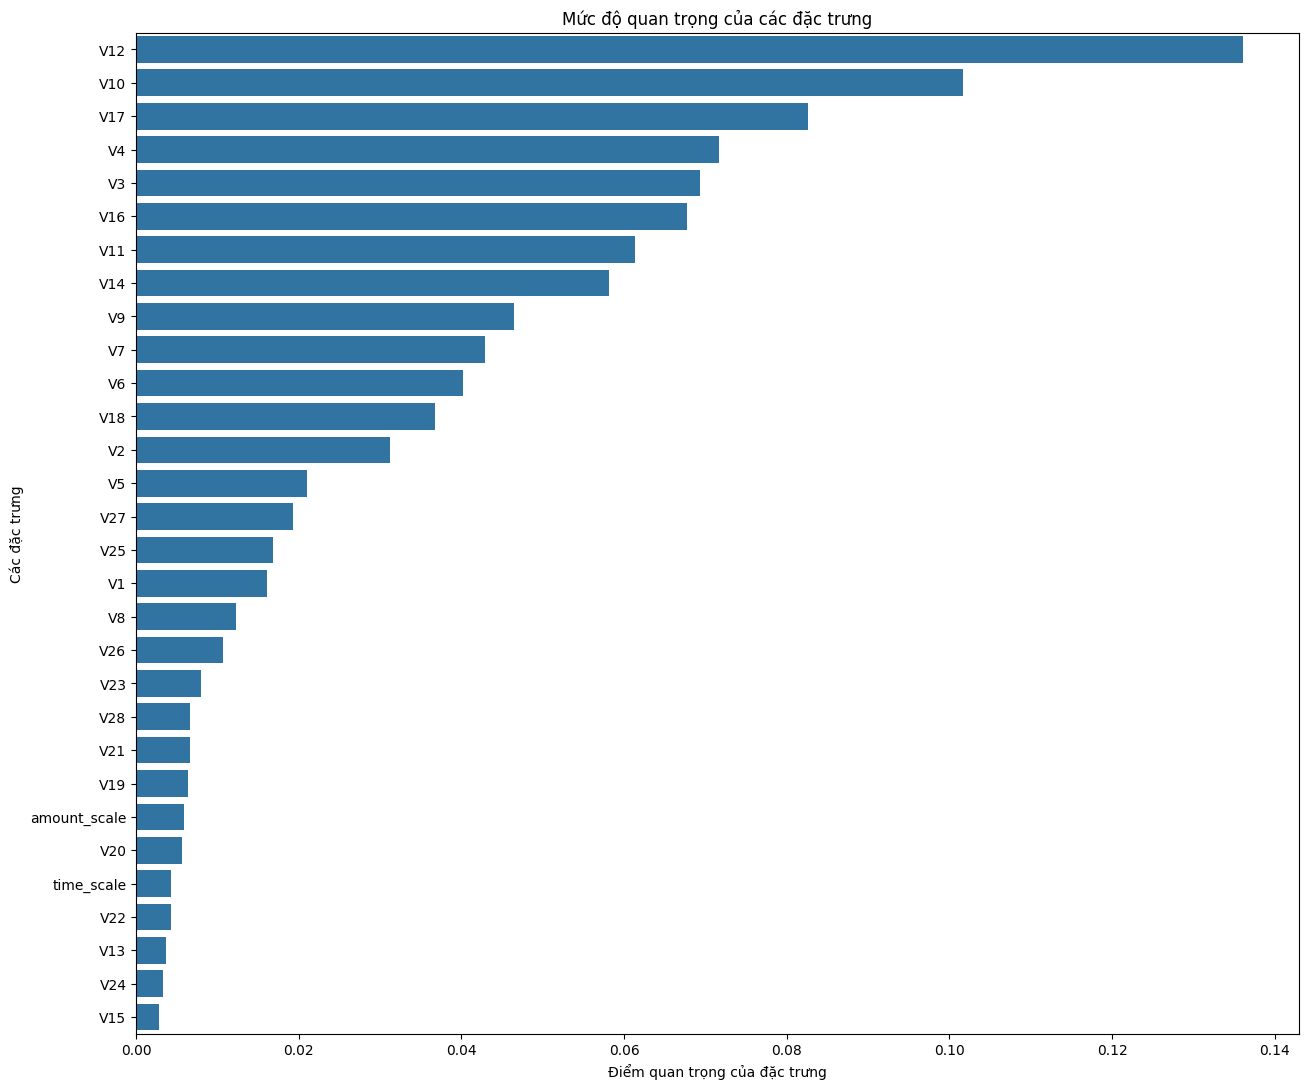

In [61]:
# Tạo Series biểu diễn mức độ quan trọng của các đặc trưng
tầm_quan_trọng_đặc_trưng = pd.Series(rf.feature_importances_,
                                     index=X_train.columns).sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(15, 13))
sns.barplot(x=tầm_quan_trọng_đặc_trưng, y=tầm_quan_trọng_đặc_trưng.index)
plt.xlabel('Điểm quan trọng của đặc trưng')
plt.ylabel('Các đặc trưng')
plt.title('Mức độ quan trọng của các đặc trưng')
plt.show()


In [46]:
cross_val_score(rf, X_test, y_test, cv=21).mean()

np.float64(0.9751322751322752)

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       170
         1.0       1.00      0.88      0.93        24

    accuracy                           0.98       194
   macro avg       0.99      0.94      0.96       194
weighted avg       0.98      0.98      0.98       194



In [48]:
from imblearn.metrics import classification_report_imbalanced, sensitivity_specificity_support
print('sensitivity and specificity:', sensitivity_specificity_support(y_test, y_pred_rf, average='micro', labels=pd.unique(dataset.Class)))
print(classification_report_imbalanced(y_test, y_pred_rf))

sensitivity and specificity: (np.float64(0.9845360824742269), np.float64(0.9922680412371134), None)
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.98      1.00      0.88      0.99      0.94      0.89       170
        1.0       1.00      0.88      1.00      0.93      0.94      0.86        24

avg / total       0.98      0.98      0.89      0.98      0.94      0.88       194



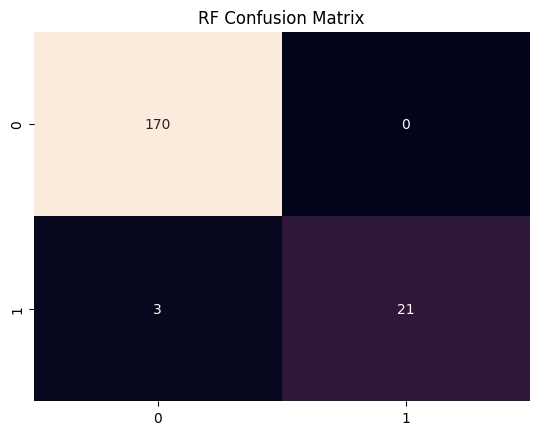

In [49]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()

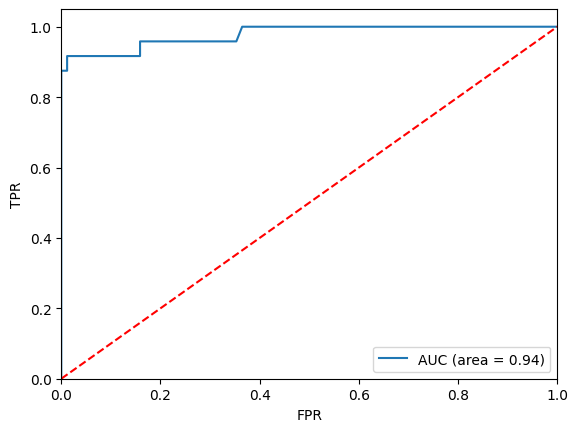

In [50]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

# Test and Conclusion

In [51]:
dataset = dataset.sample(frac=0.5)

fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud, normal])

sample_data = normal_distributed_data.sample(frac=0.5, random_state=42)

sample_data.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
15107,0.318560,0.080111,1.232597,0.186076,0.067309,0.520084,-0.136409,-0.849080,0.294565,-0.217949,...,-0.033598,-0.512222,-1.629315,0.170361,-0.165849,0.140669,-0.100924,-0.052315,0.019095,0.0
4668,-0.245144,-0.924444,-0.714847,1.288490,1.714777,0.146772,0.016590,-0.588978,0.536608,-0.031472,...,0.147270,-0.358926,-0.612018,0.063119,0.322711,-0.275940,0.046264,0.367403,0.173506,0.0
24762,0.936336,0.390324,-0.567183,-0.100837,2.010988,-0.916075,-0.108690,1.077391,0.477887,-0.066144,...,-0.507841,-0.241586,0.118585,-0.352966,-0.876982,0.070924,-0.373954,-0.289236,-0.364829,0.0
631,-0.304448,-1.085878,1.039079,1.158034,-1.555174,1.500270,1.556148,0.036028,0.499065,0.148227,...,-0.135222,-0.060672,0.113742,-0.049555,-0.940148,0.525324,-0.188411,0.116878,0.087125,0.0
27109,-0.173789,0.436147,-2.046097,3.085893,-1.445237,0.886385,0.729395,-0.656314,-0.219334,-1.611154,...,-0.715440,2.383850,-0.720949,0.093349,-0.128125,0.124779,-0.364239,-0.078999,0.073135,0.0


In [52]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [54]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x = pd.DataFrame(x_scaled)
x = x.values
x = np.asarray(x)
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean)/x_std
print(x.shape)

x = np.reshape(x, (x.shape[0], x.shape[1], 1))

(270, 30)


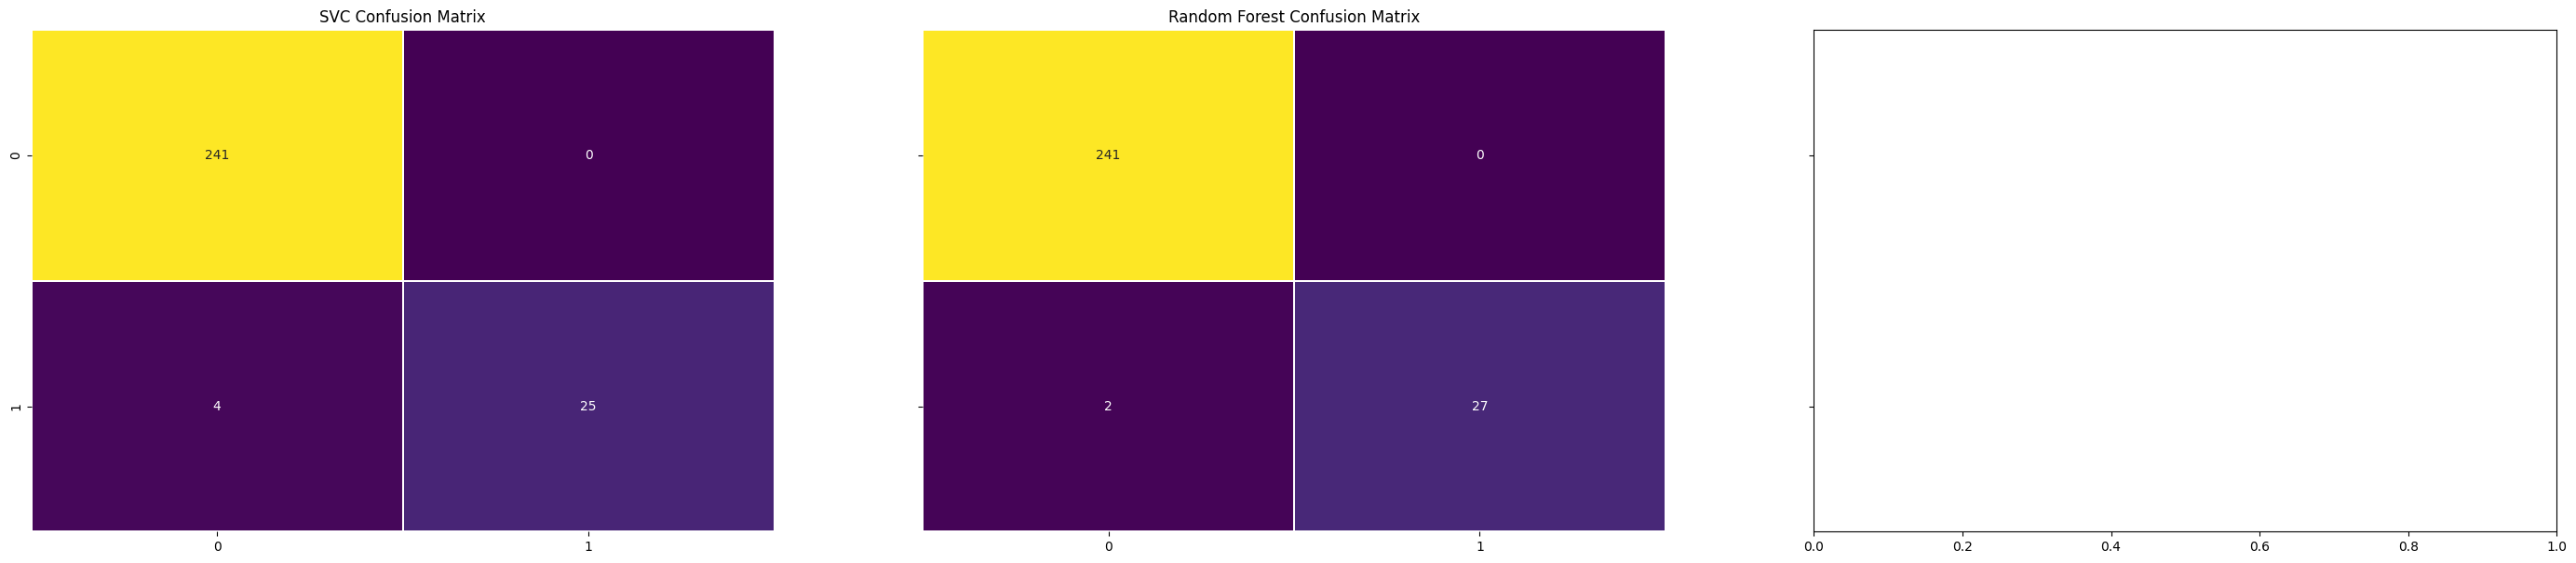

In [55]:
from sklearn.metrics import confusion_matrix

y_pred_svm = svm.predict(X)
y_pred_rf = rf.predict(X)

f, (axes1, axes2, axes3) = plt.subplots(1,3,sharey=True)
f.set_figheight(7)
f.set_figwidth(35)
sns.heatmap(confusion_matrix(y, y_pred_svm), annot=True, linewidths=.3, fmt= 'd',ax=axes1, cmap='viridis', cbar=False)
axes1.title.set_text('SVC Confusion Matrix')
sns.heatmap(confusion_matrix(y, y_pred_rf), annot=True, linewidths=.3, fmt= 'd',ax=axes2, cmap='viridis', cbar=False)
axes2.title.set_text('Random Forest Confusion Matrix')
plt.savefig("cm_all.png")
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

models = [svm, rf]
result = []
results = pd.DataFrame(columns=['Models', "Accuracy"])

for model in models:
    names = model.__class__.__name__
    print(names)
    if names == 'Sequential':
        y_pred = model.predict_classes(x)
    else:
        y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    result = pd.DataFrame([[names, acc*100]], columns=['Models', 'Accuracy'])
    results = pd.concat([results, result], ignore_index=True)

SVC
RandomForestClassifier


<ipython-input-57-283552949>:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



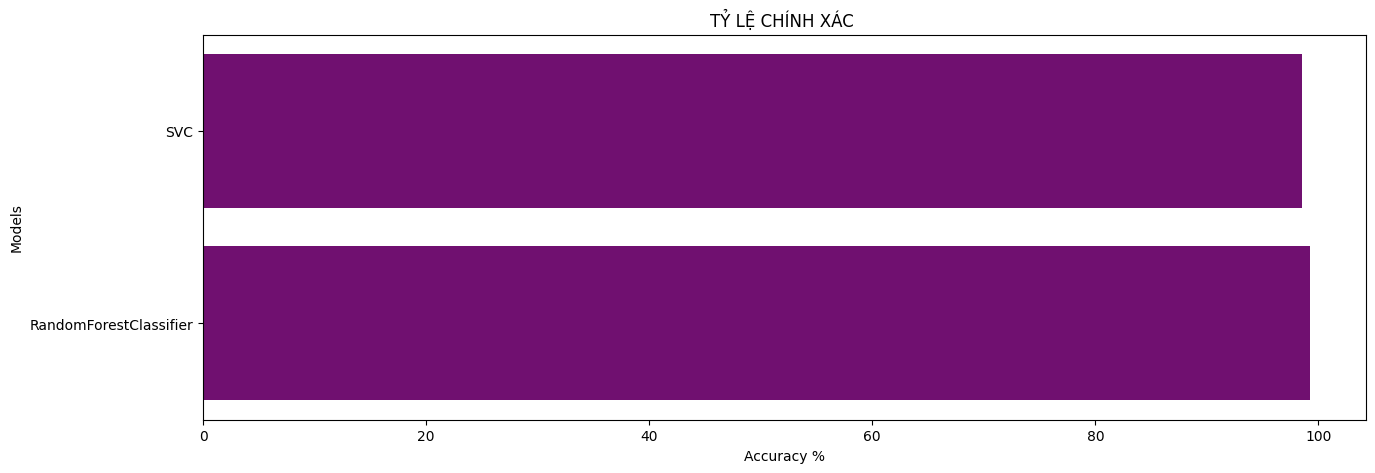

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(x='Accuracy', y='Models', data=results, color='purple')
plt.xlabel('Accuracy %')
plt.title('TỶ LỆ CHÍNH XÁC ');

In [60]:
results

,Models,Accuracy
0,SVC,98.518519
1,RandomForestClassifier,99.259259
